<a href="https://colab.research.google.com/github/himanshushakyawar/Python_AI_ML_NIT/blob/main/PMF_%26_CDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy import stats

In [2]:
stats.binom.pmf(5,20,0.1)

0.03192136111995428

In [3]:
stats.binom.cdf(5,20,0.1)

0.988746865835491

In [4]:
1 - stats.binom.cdf(5,20,0.1)

0.011253134164509015

In [5]:
#n*p
# n*p*(1-p)
mean, var = stats.binom.stats(20,0.1)

In [6]:
mean

array(2.)

In [7]:
var

array(1.8)

# Normal Distribution of data

In [8]:
import pandas as pd
import numpy as np
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/GLAXO.csv
!wget https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/BEML.csv

--2021-12-05 16:00:02--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/GLAXO.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 107633 (105K) [text/plain]
Saving to: ‘GLAXO.csv’

GLAXO.csv           100%[===================>] 105.11K  --.-KB/s    in 0.02s   

2021-12-05 16:00:02 (5.31 MB/s) - ‘GLAXO.csv’ saved [107633/107633]

--2021-12-05 16:00:02--  https://raw.githubusercontent.com/nachikethmurthy/Source-Code-Dataset-for-Machine-Learning-using-Python/main/Data/BEML.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connecte

In [9]:
beml_df = pd.read_csv( 'BEML.csv' ) 
beml_df[0:5] 

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [10]:
glaxo_df = pd.read_csv( 'GLAXO.csv' ) 
glaxo_df[0:5] 

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [11]:
beml_df = beml_df[['Date', 'Close']] 
glaxo_df = glaxo_df[['Date', 'Close']]

In [12]:
beml_df.head()

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05


In [13]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']) ) 
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']) ) 

In [14]:
glaxo_df.head()

,Date,Close
Date,,
2010-01-04,2010-01-04,1625.65
2010-01-05,2010-01-05,1616.80
2010-01-06,2010-01-06,1638.50
2010-01-07,2010-01-07,1648.70
2010-01-08,2010-01-08,1639.80


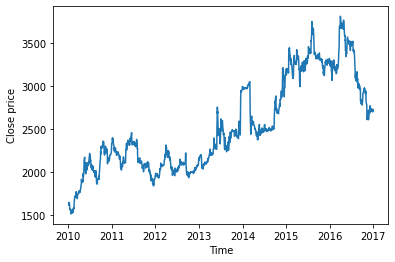

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(glaxo_df["Close"])
plt.xlabel("Time")
plt.ylabel("Close price")
plt.show()

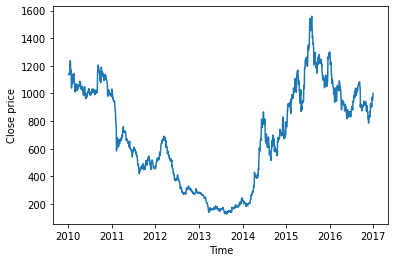

In [16]:
plt.plot(beml_df["Close"])
plt.xlabel("Time")
plt.ylabel("Close price")
plt.show()

## Questions

In [17]:
# 1. what is the expected daily rate of return of these stocks
# 2. which stock has higher risk/volatility when it comes to daily returns
# 3. What is the expected range of return for 95% Confidence interval
# 4. Which stock has high probability for profits making 2% or more ?
# 5. Which has stock has probablity of making loss 2% or more ?

In [18]:
glaxo_df["gain"] = glaxo_df["Close"].pct_change(periods=1)
beml_df["gain"] = beml_df["Close"].pct_change(periods=1)

In [19]:
glaxo_df.head()

,Date,Close,gain
Date,,,
2010-01-04,2010-01-04,1625.65,NaN
2010-01-05,2010-01-05,1616.80,-0.005444
2010-01-06,2010-01-06,1638.50,0.013422
2010-01-07,2010-01-07,1648.70,0.006225
2010-01-08,2010-01-08,1639.80,-0.005398


In [20]:
glaxo_df.dropna(inplace=True)
beml_df.dropna(inplace=True)

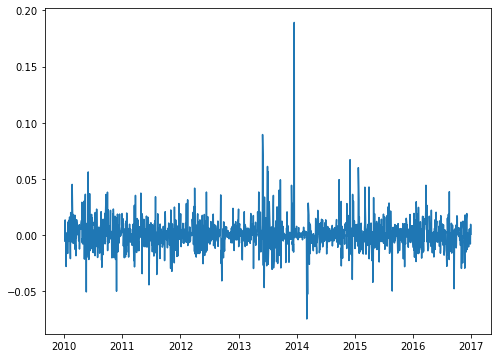

In [21]:
plt.figure(figsize=(8,6))
plt.plot(glaxo_df.index,glaxo_df["gain"])
plt.show()

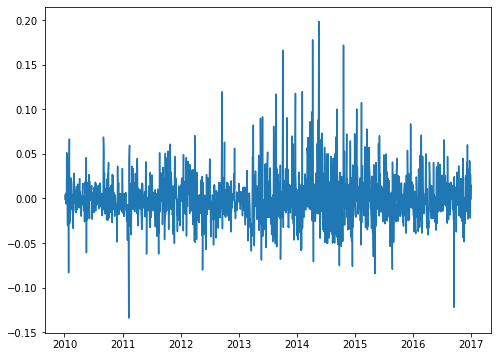

In [22]:
plt.figure(figsize=(8,6))
plt.plot(beml_df.index,beml_df["gain"])
plt.show()

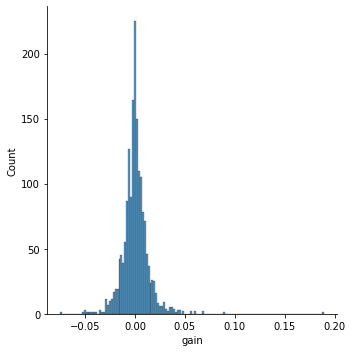

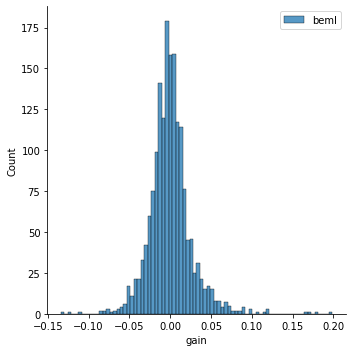

In [23]:
sns.displot(glaxo_df["gain"],label="glaxo")
sns.displot(beml_df["gain"],label="beml")
plt.legend()
plt.show()

In [24]:
glaxo_df["gain"].describe()

count    1738.000000
mean        0.000386
std         0.013361
min        -0.074719
25%        -0.005850
50%        -0.000021
75%         0.005826
max         0.189196
Name: gain, dtype: float64

In [25]:
beml_df["gain"].describe()

count    1738.000000
mean        0.000271
std         0.026431
min        -0.133940
25%        -0.013736
50%        -0.001541
75%         0.011985
max         0.198329
Name: gain, dtype: float64

In [26]:
glaxo_df_ci = stats.norm.interval(0.95,
                                  loc = glaxo_df["gain"].mean(),
                                  scale = glaxo_df["gain"].std() )
print("95% CI is given by", np.round(glaxo_df_ci,4))

95% CI is given by [-0.0258  0.0266]


In [27]:
beml_df_ci = stats.norm.interval(0.95,
                                  loc =beml_df["gain"].mean(),
                                  scale=beml_df["gain"].std() )
print("95% CI is given by", np.round(beml_df_ci,4))

95% CI is given by [-0.0515  0.0521]


In [28]:
# 4. Which stock has high probability for profits making 2% or more ?
# 5. Which has stock has probablity of making loss 2% or more ?

p_2_less_glaxo = stats.norm.cdf(0.02,
                          loc = glaxo_df["gain"].mean(),
                          scale = glaxo_df["gain"].std())
p_2_less_glaxo

0.9289548854238143

In [29]:
1 - p_2_less_glaxo

0.07104511457618568

In [30]:
p_2_less_beml = stats.norm.cdf(0.02,
                          loc = beml_df["gain"].mean(),
                          scale = beml_df["gain"].std())
p_2_less_beml

0.7723017051592466

In [31]:
1 - p_2_less_beml

0.22769829484075343

In [32]:
stats.norm.cdf(-0.02,
               loc = glaxo_df["gain"].mean(),
               scale = glaxo_df["gain"].std())

0.06352488667177397

In [42]:
stats.norm.cdf(-0.02,
               loc = beml_df["gain"].mean(),
               scale = beml_df["gain"].std())

0.22155987503755292